# Facebook Metrics  - Total Interactions Estimator

The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.

This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.

The task of this experiment is to estimate the Total Interactions on the Facebook page given a product being marketed.

### Data Loading

Objective: Load and perform basic cleaning (optionally) of the available data.

In [1]:
# import all libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [2]:
# load available dataset
df_all_data = pd.read_csv('../data/facebook+metrics/dataset_Facebook.csv', delimiter=';')
df_all_data.sample(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
270,128032,Photo,2,7,4,5,1.0,53056,65260,2003,1412,2089,23679,17104,975,6,696.0,28.0,730
405,107907,Photo,3,4,7,10,0.0,4390,7004,484,453,602,4607,2862,347,1,63.0,26.0,90
404,107907,Photo,3,4,1,3,0.0,4552,7253,471,444,569,4440,2664,316,1,52.0,24.0,77
342,117764,Photo,2,5,2,11,0.0,6444,11509,734,625,1157,7910,4136,512,5,194.0,33.0,232
488,85979,Photo,3,1,7,10,0.0,9700,17442,1407,1271,2007,8872,4876,660,21,277.0,80.0,378


In [3]:
# check basic properties of the data
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

**Observations**:

1. There are a few missing observations in columns like 'like', 'share', 'Paid'.
2. The column names contain white spaces, we can convert and clean them.
3. All features are numerical in nature and are read by Pandas without any data quality issues upfront.

In [4]:
# get a list of all columns
# and change their names to
# suitable format

# existing columns
all_columns = df_all_data.columns

# new col. names
new_col_names = []

# make changes
for each_col in all_columns:

    # remove the word 'Lifetime Post'
    each_col = each_col.replace('Lifetime Post','')

    # remove the word 'Lifetime Post'
    each_col = each_col.replace('Lifetime','')

    # Impressions by people who have liked your Page --> impressions
    each_col = each_col.replace('Impressions by people who have liked your Page','impressions')

    # reach by people who like your Page --> reach
    each_col = each_col.replace('reach by people who like your Page','reach')

    # People who have liked your Page and engaged with your post --> people_engaged
    each_col = each_col.replace('People who have liked your Page and engaged with your post','people_engaged')

    # remove whitespaces
    each_col = each_col.replace(' ','')

    # convert in lower case
    each_col = each_col.lower()

    # append in final list
    new_col_names.append(each_col)

# print new list
print(new_col_names)

['pagetotallikes', 'type', 'category', 'postmonth', 'postweekday', 'posthour', 'paid', 'totalreach', 'totalimpressions', 'engagedusers', 'consumers', 'consumptions', 'impressions', 'reach', 'people_engaged', 'comment', 'like', 'share', 'totalinteractions']


In [5]:
# creating new dataframe with revised set of columns. 
df_all_data_revised = df_all_data.set_axis(new_col_names, axis=1)
df_all_data_revised.head()

,pagetotallikes,type,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share,totalinteractions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
# checking information of new dataframe
df_all_data_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pagetotallikes     500 non-null    int64  
 1   type               500 non-null    object 
 2   category           500 non-null    int64  
 3   postmonth          500 non-null    int64  
 4   postweekday        500 non-null    int64  
 5   posthour           500 non-null    int64  
 6   paid               499 non-null    float64
 7   totalreach         500 non-null    int64  
 8   totalimpressions   500 non-null    int64  
 9   engagedusers       500 non-null    int64  
 10  consumers          500 non-null    int64  
 11  consumptions       500 non-null    int64  
 12  impressions        500 non-null    int64  
 13  reach              500 non-null    int64  
 14  people_engaged     500 non-null    int64  
 15  comment            500 non-null    int64  
 16  like               499 non

**Observations**:

1. At this stage we should remove NULL or Missing values from the dataframe. Since they are too less in %-age, there is no requirement for imputation.
2. In the next section we can perform further deep-dive data analysis.

In [7]:
# remove nulls from the new dataframe
df_all_data_revised.dropna(inplace=True)

In [8]:
# Checking dataframe information.
df_all_data_revised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pagetotallikes     495 non-null    int64  
 1   type               495 non-null    object 
 2   category           495 non-null    int64  
 3   postmonth          495 non-null    int64  
 4   postweekday        495 non-null    int64  
 5   posthour           495 non-null    int64  
 6   paid               495 non-null    float64
 7   totalreach         495 non-null    int64  
 8   totalimpressions   495 non-null    int64  
 9   engagedusers       495 non-null    int64  
 10  consumers          495 non-null    int64  
 11  consumptions       495 non-null    int64  
 12  impressions        495 non-null    int64  
 13  reach              495 non-null    int64  
 14  people_engaged     495 non-null    int64  
 15  comment            495 non-null    int64  
 16  like               495 non-null

Dataset is now ready for further analysis and ML modelling.

### Data Analysis

Objective: Performing Exploratory data analysis on available data using Visualizations. 

In [9]:
# checking basic statistics of the data.
df_all_data_revised.describe()

,pagetotallikes,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share,totalinteractions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


Since the features and target are all numerical in nature (other than the "type" column), let's perform a correlation analysis first, without this column.

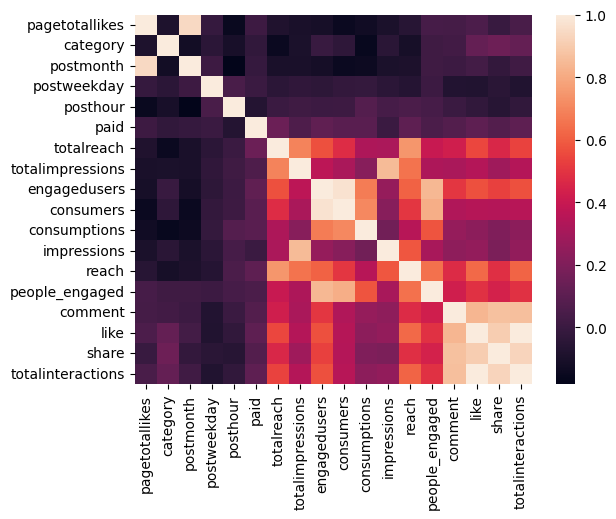

In [10]:
# visualizing correlation of all columns. 
df_all_data_correlation = df_all_data_revised.drop('type', axis=1, inplace=False)
plt.Figure(figsize=(18,14))
sns.heatmap(df_all_data_correlation.corr())
plt.show();

**Observations**

1. Features like comment, like and share are the most related with the total interactions on the product page. 
2. Features like reach, total reach and engaged users are also well correlated to the total interactions on the product page.
3. Rest of the features are not much related it seems.

This gives a good idea on the 2 basic models we can create - one with all features, and one with only the most correlated features!

Further, let's perform visual analysis of each of the features individually.

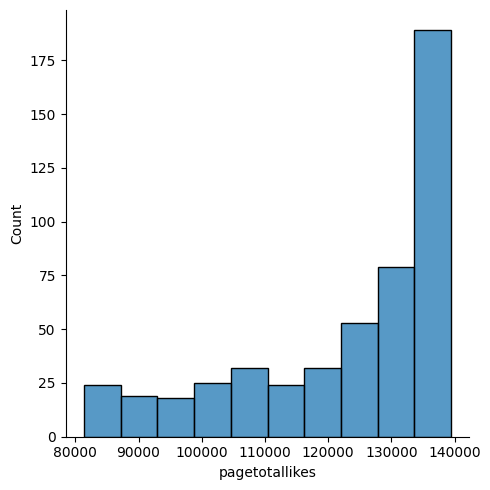

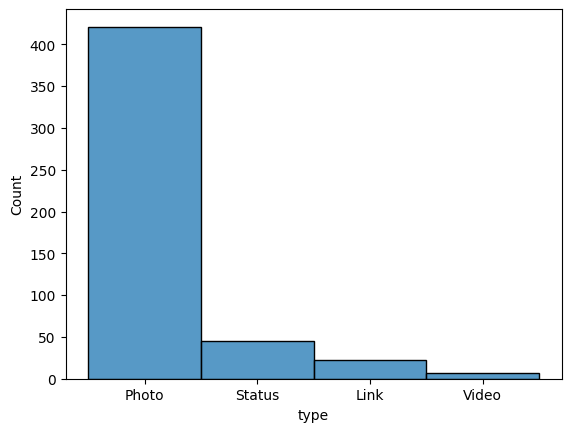

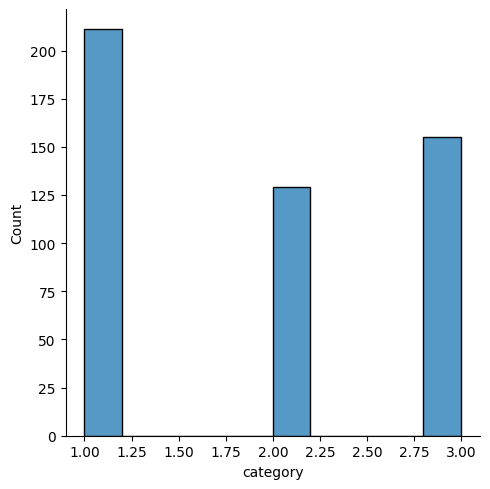

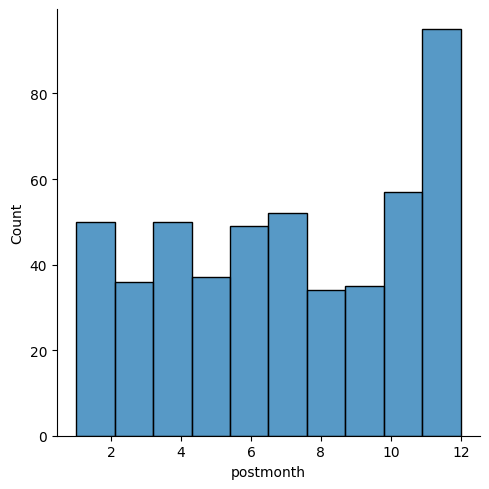

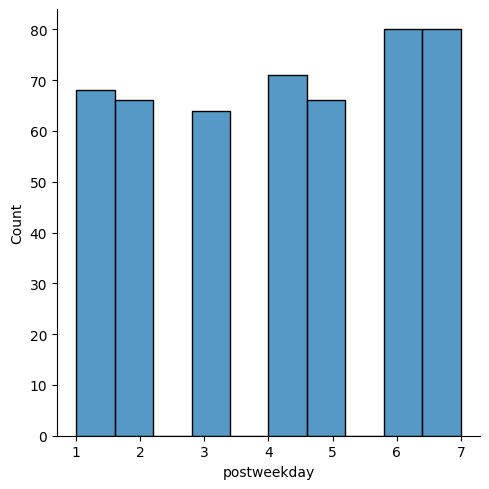

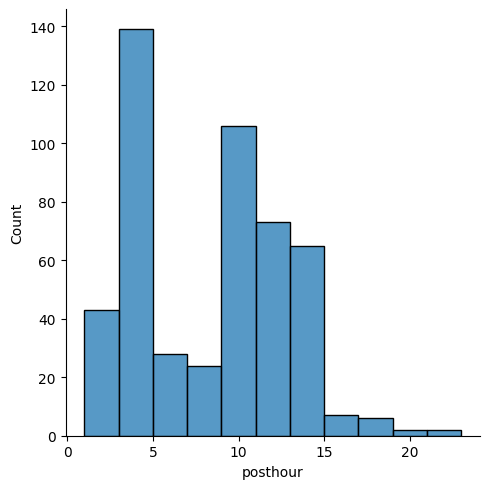

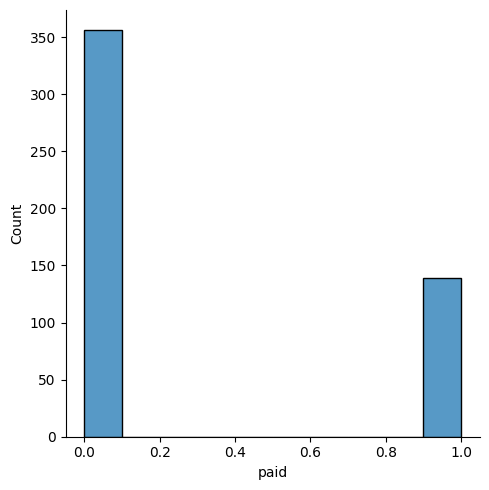

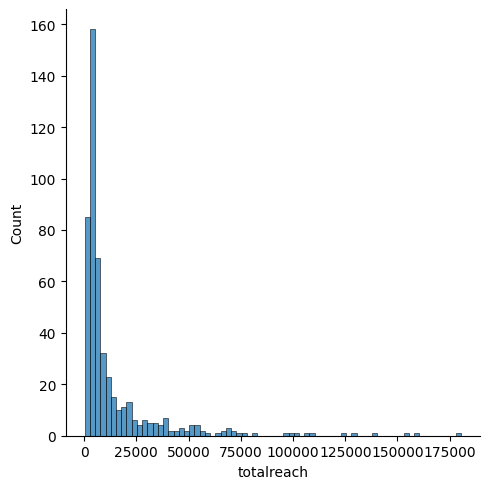

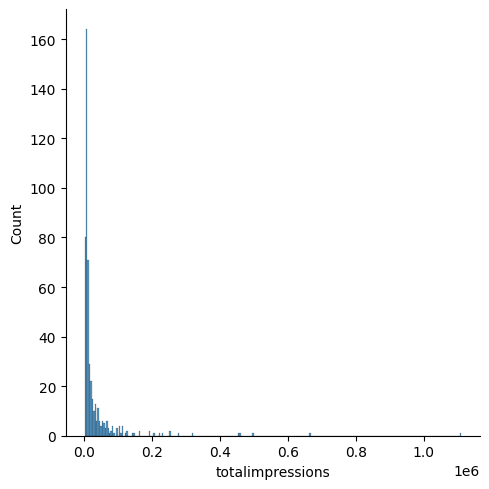

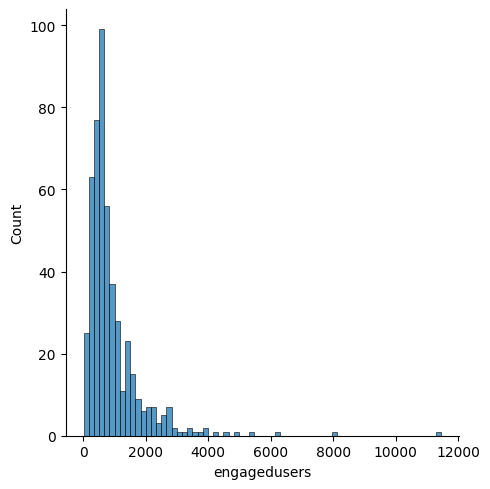

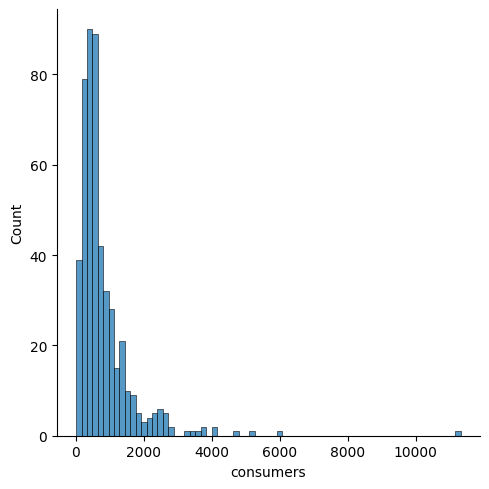

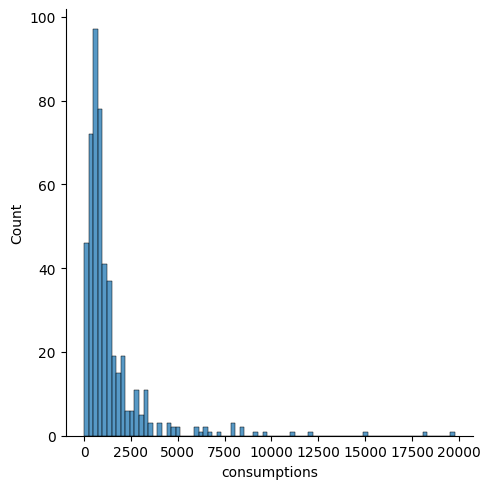

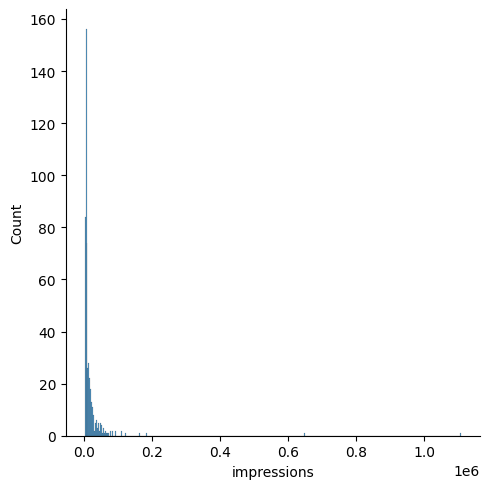

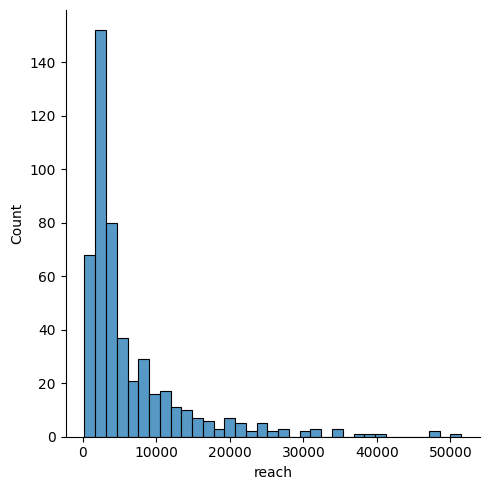

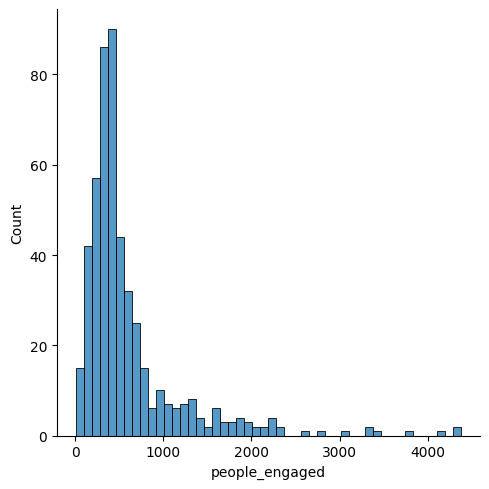

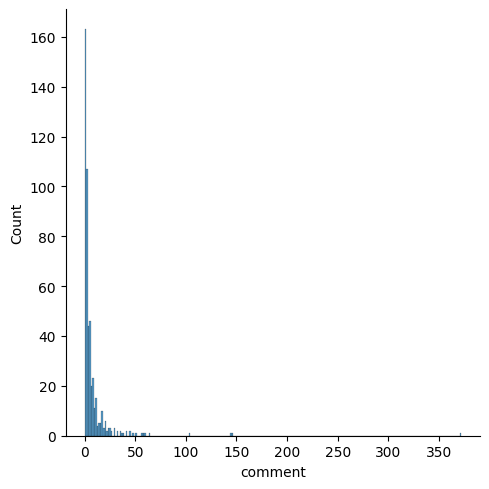

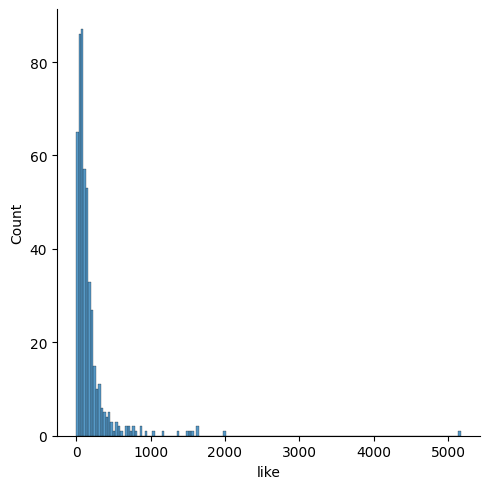

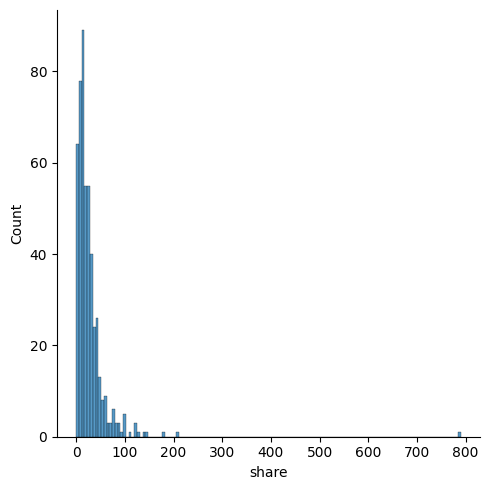

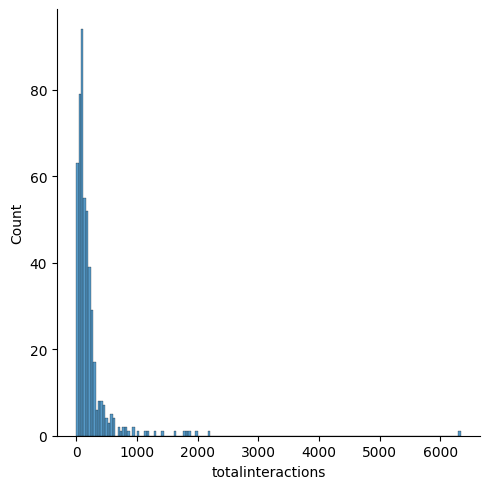

In [75]:
# perform univariate analysis of each column
# by identifying its type.
for each_col in df_all_data_revised.columns:
    if df_all_data_revised.dtypes[each_col] == 'O':
        plt.Figure(figsize=(8,4))
        sns.histplot(df_all_data_revised[each_col])
        plt.show();
    else:
        plt.Figure(figsize=(8,4))
        sns.displot(df_all_data_revised[each_col])
        plt.show();

**Observations**

1. None of the data columns are statistically normally distributed - they are almost always right skewed.
2. The type of content given for most of the products are more of photos always and less for other types like Videos.
3. Most of the posts are seen during month(s) of December, while we see most no. of posts during 4am and 12pm hours.
4. There are mostly free posts/ads on this product page than paid ones.
5. For almost all continuous columns, we have presence of one or more outliers.

In lieu of this, in the feature engineering section, we should normalize all the features before using them. 
Additionally we should encode the string column with numbers.

### Feature Engineering

Objective: Perform basic feature engineering to be further used during modelling.

In [11]:
# make a copy of the dataframe
# before performing any feature engineering
df_feature_engg = df_all_data_revised.copy()

In [13]:
# create features and target sets
all_features = df_feature_engg.drop("totalinteractions", axis=1)
target_variable = df_feature_engg["totalinteractions"]
print("Shape of Features' data: {}".format(all_features.shape))
print("Shape of Target data: {}".format(target_variable.shape))

Shape of Features' data: (495, 18)
Shape of Target data: (495,)


In [14]:
# let's now divide the data into training and test splits
x_train, x_test, y_train, y_test = train_test_split(all_features, target_variable, test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(371, 18)
(124, 18)
(371,)
(124,)


**Normalizing the Training Data**

In [15]:
# create dataframe only with numeric columns
# first identify numeric and string columns
str_cols = []
num_cols = []
for each_col in x_train.columns:
    try:
        _ = df_feature_engg[each_col] / 2
        num_cols.append(each_col)
    except Exception as e:
        str_cols.append(each_col)

# now create dataframe only with numeric cols
df_num_cols = x_train[num_cols]

In [16]:
# normalize all columns in the data
df_num_norm = pd.DataFrame(normalize(df_num_cols), columns=df_num_cols.columns)
df_num_norm.head()

,pagetotallikes,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share
0,0.988365,0.000009,0.000035,0.000035,0.000105,0.000009,0.060162,0.102625,0.005868,0.005588,0.007774,0.082101,0.045751,0.004862,0.000000,0.000516,0.000140
1,0.966283,0.000008,0.000046,0.000015,0.000015,0.000000,0.089388,0.165883,0.008923,0.008754,0.015708,0.154037,0.081295,0.007077,0.000038,0.000415,0.000054
2,0.999885,0.000007,0.000073,0.000044,0.000059,0.000000,0.004780,0.009757,0.001569,0.001510,0.001825,0.009156,0.004311,0.001334,0.000000,0.000081,0.000007
3,0.999839,0.000007,0.000073,0.000051,0.000088,0.000007,0.005949,0.011473,0.002363,0.002334,0.002832,0.010259,0.005085,0.002049,0.000000,0.000029,0.000015
4,0.999569,0.000022,0.000087,0.000022,0.000022,0.000000,0.012436,0.021528,0.001177,0.000888,0.001069,0.013490,0.007583,0.000888,0.000014,0.000289,0.000087


In [17]:
# perform one hot encoding of the string cols.
df_str_cols = x_train[str_cols]
df_str_cols.reset_index(drop=True, inplace=True)
df_cat_enc = pd.get_dummies(df_str_cols, drop_first=True, dtype='int')
df_cat_enc.reset_index(drop=True, inplace=True)
df_cat_enc.head()

,type_Photo,type_Status,type_Video
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
# join the two separate dataframes
# one with transformed numerical cols
# another with transformed categorical cols

# set all columns
all_columns = []
for each_col in list(df_num_norm.columns):
    all_columns.append(each_col)
for each_col in list(df_cat_enc.columns):
    all_columns.append(each_col)

# prepare final dataframe
x_train_ready = pd.concat([df_num_norm, df_cat_enc], axis=1, ignore_index=True)
x_train_ready.columns = all_columns

# print sample data of final data
x_train_ready.head()

,pagetotallikes,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share,type_Photo,type_Status,type_Video
0,0.988365,0.000009,0.000035,0.000035,0.000105,0.000009,0.060162,0.102625,0.005868,0.005588,0.007774,0.082101,0.045751,0.004862,0.000000,0.000516,0.000140,1,0,0
1,0.966283,0.000008,0.000046,0.000015,0.000015,0.000000,0.089388,0.165883,0.008923,0.008754,0.015708,0.154037,0.081295,0.007077,0.000038,0.000415,0.000054,1,0,0
2,0.999885,0.000007,0.000073,0.000044,0.000059,0.000000,0.004780,0.009757,0.001569,0.001510,0.001825,0.009156,0.004311,0.001334,0.000000,0.000081,0.000007,1,0,0
3,0.999839,0.000007,0.000073,0.000051,0.000088,0.000007,0.005949,0.011473,0.002363,0.002334,0.002832,0.010259,0.005085,0.002049,0.000000,0.000029,0.000015,1,0,0
4,0.999569,0.000022,0.000087,0.000022,0.000022,0.000000,0.012436,0.021528,0.001177,0.000888,0.001069,0.013490,0.007583,0.000888,0.000014,0.000289,0.000087,1,0,0


**Normalizing Testing Data**

In [25]:
# create dataframe only with numeric columns
# first identify numeric and string columns
str_cols = []
num_cols = []
for each_col in x_test.columns:
    try:
        _ = df_feature_engg[each_col] / 2
        num_cols.append(each_col)
    except Exception as e:
        str_cols.append(each_col)

# now create dataframe only with numeric cols
df_num_cols = x_test[num_cols]

In [26]:
# normalize all columns in the data
df_num_norm = pd.DataFrame(normalize(df_num_cols), columns=df_num_cols.columns)
df_num_norm.head()

,pagetotallikes,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share
0,0.996030,0.000015,0.000060,0.000045,0.000075,0.0,0.039381,0.065088,0.005241,0.003951,0.005756,0.038195,0.024186,0.003504,0.000067,0.002073,0.000321
1,0.999365,0.000015,0.000060,0.000037,0.000097,0.0,0.014363,0.023369,0.002730,0.002476,0.003202,0.019008,0.011363,0.001878,0.000007,0.000389,0.000052
2,0.999851,0.000007,0.000073,0.000044,0.000088,0.0,0.005527,0.011069,0.001510,0.001503,0.001847,0.010483,0.005058,0.001283,0.000000,0.000022,0.000000
3,0.967118,0.000011,0.000021,0.000032,0.000137,0.0,0.098957,0.158505,0.004738,0.004030,0.005341,0.147220,0.089480,0.004146,0.000042,0.001206,0.000137
4,0.997935,0.000015,0.000066,0.000030,0.000074,0.0,0.026440,0.048112,0.003964,0.003174,0.004407,0.028470,0.015678,0.002982,0.000030,0.001137,0.000266


In [27]:
# perform one hot encoding of the string cols.
df_str_cols = x_test[str_cols]
df_str_cols.reset_index(drop=True, inplace=True)
df_cat_enc = pd.get_dummies(df_str_cols, drop_first=True, dtype='int')
df_cat_enc.reset_index(drop=True, inplace=True)
df_cat_enc.head()

,type_Photo,type_Status,type_Video
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,1,0,0


In [28]:
# join the two separate dataframes
# one with transformed numerical cols
# another with transformed categorical cols

# set all columns
all_columns = []
for each_col in list(df_num_norm.columns):
    all_columns.append(each_col)
for each_col in list(df_cat_enc.columns):
    all_columns.append(each_col)

# prepare final dataframe
x_test_ready = pd.concat([df_num_norm, df_cat_enc], axis=1, ignore_index=True)
x_test_ready.columns = all_columns

# print sample data of final data
x_test_ready.head()

,pagetotallikes,category,postmonth,postweekday,posthour,paid,totalreach,totalimpressions,engagedusers,consumers,consumptions,impressions,reach,people_engaged,comment,like,share,type_Photo,type_Status,type_Video
0,0.996030,0.000015,0.000060,0.000045,0.000075,0.0,0.039381,0.065088,0.005241,0.003951,0.005756,0.038195,0.024186,0.003504,0.000067,0.002073,0.000321,1,0,0
1,0.999365,0.000015,0.000060,0.000037,0.000097,0.0,0.014363,0.023369,0.002730,0.002476,0.003202,0.019008,0.011363,0.001878,0.000007,0.000389,0.000052,1,0,0
2,0.999851,0.000007,0.000073,0.000044,0.000088,0.0,0.005527,0.011069,0.001510,0.001503,0.001847,0.010483,0.005058,0.001283,0.000000,0.000022,0.000000,1,0,0
3,0.967118,0.000011,0.000021,0.000032,0.000137,0.0,0.098957,0.158505,0.004738,0.004030,0.005341,0.147220,0.089480,0.004146,0.000042,0.001206,0.000137,0,0,0
4,0.997935,0.000015,0.000066,0.000030,0.000074,0.0,0.026440,0.048112,0.003964,0.003174,0.004407,0.028470,0.015678,0.002982,0.000030,0.001137,0.000266,1,0,0


### Initial Modelling

Objective: Create the first version of the model, and evaluate its performance.

In [30]:
# Create a linear regression model object.
lr_init = LinearRegression()

In [31]:
# fit the model with training data. 
lr_init.fit(x_train_ready, y_train)

LinearRegression()

In [33]:
# get predictions
y_pred = lr_init.predict(x_test_ready)

# calculate the metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score = r2_score(y_true=y_test,y_pred=y_pred)

# print the metrics values
print("MAE:",mae)
print("RMSE:",rmse)
print("Adj. R-Squared:",r2score)


MAE: 95.33984365958854
RMSE: 164.4233012041271
Adj. R-Squared: 0.5779718204754447


### Model Tuning

Objective: Perform Hyperparameter tuning (if applicable), or other improvements to data/model parameters to improve the base model's performance. 

**Note**: In our case, we will use different subset of data (with only the most correlated columns to fit the model) and compare with the initial model.

In [34]:
# getting data with specific columns
# from the ready dataframe
x_train_select = x_train_ready[['comment', 'like', 'share', 'totalreach', 'engagedusers', 'reach']]
x_test_select = x_test_ready[['comment', 'like', 'share', 'totalreach', 'engagedusers', 'reach']]

In [35]:
# fitting new model & getting predictions
lr_select = LinearRegression()
lr_select.fit(x_train_select, y_train)
y_pred = lr_select.predict(x_test_select)

In [36]:
# calculate the metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score = r2_score(y_true=y_test,y_pred=y_pred)

# print the metrics values
print("MAE:",mae)
print("RMSE:",rmse)
print("Adj. R-Squared:",r2score)

MAE: 94.01318436591994
RMSE: 133.19737836420964
Adj. R-Squared: 0.7230469976843845


**Lasso Regression**

In [37]:
# Import Lasso Regression algorithm
from sklearn.linear_model import Lasso

# Load your data
model = Lasso(alpha=0.1)  # alpha is the regularization parameter
model.fit(x_train_select, y_train)

# Make predictions
y_pred = model.predict(x_test_select)

# Get Metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score = r2_score(y_true=y_test,y_pred=y_pred)

# Print the metrics
print("MAE:",mae)
print("RMSE:",rmse)
print("Adj. R-Squared:",r2score)


MAE: 55.49221727644572
RMSE: 89.55644531935314
Adj. R-Squared: 0.8747988211902665


**Ridge Regression**

In [38]:
from sklearn.linear_model import Ridge

# Load data
model = Ridge(alpha=0.1)  # alpha is the regularization parameter
model.fit(x_train_select, y_train)

# Make predictions
y_pred = model.predict(x_test_select)

# Get Metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score = r2_score(y_true=y_test,y_pred=y_pred)

# Print metrics
print("MAE:",mae)
print("RMSE:",rmse)
print("Adj. R-Squared:",r2score)

MAE: 137.69124907069974
RMSE: 237.16692939245587
Adj. R-Squared: 0.12194244278871458


**Hyperparameter Tuning**

In [45]:
# import Grid search Cross-val library
from sklearn.model_selection import GridSearchCV

# define range of alpha values
# between 0.01 until 10
alpha_range = [num / 100 for num in range(1, 1001, 49)]

# Define the parameter grid to search over (alpha values in this case)
param_grid = {'alpha': alpha_range}

# Create a GridSearchCV object with Lasso model and the parameter grid
lasso_grid = GridSearchCV(Lasso(alpha=0.1), param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search to the training data
lasso_grid.fit(x_train_select, y_train)

# Get the best model with the best parameters
best_lasso = lasso_grid.best_estimator_
print("Best Lasso Regression model: {}".format(best_lasso))

Best Lasso Regression model: Lasso(alpha=0.01)


In [46]:
# Use the best model for prediction
y_pred = best_lasso.predict(x_test_select)

# Get Metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
r2score = r2_score(y_true=y_test,y_pred=y_pred)

# Print metrics
print("MAE:",mae)
print("RMSE:",rmse)
print("Adj. R-Squared:",r2score)

MAE: 86.92156080361173
RMSE: 131.29258666197111
Adj. R-Squared: 0.7309115030523101


### Model Export

Objective: Export the final model for consumption

In [43]:
# Importing the pickle library
import pickle

# Retrieve from GridSearchCV
best_lasso = lasso_grid.best_estimator_

# Save model to pickle file
filename = 'best_lasso_model_v1.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_lasso, file)


In [44]:
# Load model from pickle file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# what's the type of the loaded file?
print(type(loaded_model))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>


## End.